In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(0)

In [2]:
def test1():
    data = [
        [6, 1, 0, 1, 2],
        [4, 2, 5, 4, 6],
        [0, 10, 2, 7, 7],
        [5, 7, 3, 2, 5],
        [6, 0, 0, 5, 7],
        [1, 8, 3, 2, 3],
        [0, 1, 7, 2, 3],
        [7, 8, 10, 10, 0],
        [7, 2, 9, 0, 3],
        [3, 4, 10, 9, 0],
        [0, 6, 1, 7, 6],
        [1, 4, 0, 8, 3],
        [9, 6, 8, 4, 2],
        [6, 5, 4, 1, 5],
        [10, 5, 10, 3, 5],
        [7, 10, 5, 9, 6],
        [8, 3, 5, 0, 9],
        [0, 0, 2, 6, 5],
        [9, 0, 8, 4, 3],
        [9, 5, 8, 4, 10],
        [7, 2, 8, 8, 3],
        [6, 10, 5, 1, 4],
        [2, 0, 3, 0, 4],
        [7, 7, 9, 8, 10],
        [0, 6, 3, 0, 0],
        [5, 2, 2, 9, 1]
    ]
    return data

In [3]:
def test2():
    data = [
        [1, 0, 8, 4, 8],
        [9, 3, 8, 6, 7],
        [5, 6, 0, 4, 7],
        [7, 1, 4, 1, 9],
        [2, 6, 9, 8, 10],
        [0, 9, 2, 3, 1],
        [8, 2, 3, 2, 5],
        [3, 10, 4, 3, 3],
        [6, 2, 10, 8, 6],
        [6, 2, 8, 9, 8],
        [4, 7, 6, 8, 7],
        [10, 10, 6, 0, 3],
        [10, 6, 7, 6, 7],
        [9, 0, 2, 9, 6],
        [4, 5, 10, 3, 9],
        [7, 10, 0, 6, 4],
        [1, 9, 5, 6, 0],
        [10, 6, 0, 1, 0],
        [9, 4, 9, 1, 4],
        [4, 10, 4, 1, 1],
        [3, 5, 4, 3, 6],
        [2, 6, 10, 10, 4],
        [5, 2, 8, 4, 6],
        [2, 8, 5, 2, 0],
        [9, 6, 0, 4, 10],
        [3, 1, 3, 0, 0]
    ]
    return data


In [4]:
def create_distribution():
    dis = [random.randint(0, 10) for i in range(5)]
    return dis

In [5]:
def cost(distribution, data):
    num_met_expectations = 0
    sum_distribution = sum(distribution)
    for row in data:
        if sum([1 for i in range(5) if distribution[i] >= row[i]]) >= 3:
            num_met_expectations += 1
    return num_met_expectations, sum_distribution


In [6]:
d = [4, 6, 5, 4, 6]
fitness = [cost(d, test1())]
fitness

[(19, 25)]

In [7]:
def rouletteWheelSelection(p):
    r = random.random()    
    c = np.cumsum(p)
    indexes = [index for index in range(len(c)) if c[index] > r]
    return indexes[0]    

In [8]:
def single_point_crossover(distribution1, distribution2):
    index = random.randint(0, 4)
    new_distribution1 = distribution1[:index] + distribution2[index:]
    new_distribution2 = distribution2[:index] + distribution1[index:]
    return new_distribution1, new_distribution2


In [9]:
def two_point_crossover(distribution1, distribution2):
    index1 = random.randint(0, 3)
    index2 = random.randint(index1 + 1, 4)
    new_distribution1 = distribution1[:index1] + distribution2[index1:index2+1] + distribution1[index2+1:]
    new_distribution2 = distribution2[:index1] + distribution1[index1:index2+1] + distribution2[index2+1:]
    return new_distribution1, new_distribution2


In [10]:
def uniform_crossover(distribution1, distribution2):
    new_distribution1 = []
    new_distribution2 = []
    for i in range(5):
        if random.random() < 0.5:
            new_distribution1.append(distribution1[i])
            new_distribution2.append(distribution2[i])
        else:
            new_distribution1.append(distribution2[i])
            new_distribution2.append(distribution1[i])
    return new_distribution1, new_distribution2


In [11]:
def select_crossover():
    crossover_functions = [single_point_crossover, uniform_crossover, two_point_crossover]
    crossover_probabilities = [0.2, 0.5, 0.3] 
    index = rouletteWheelSelection(crossover_probabilities)
    return crossover_functions[index]


In [12]:
def swapMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    solution[index1], solution[index2] = solution[index2], solution[index1]
    return solution

In [13]:
def reversionMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    solution[min(index1, index2):max(index1, index2)+1] = solution[min(index1, index2):max(index1, index2)+1][::-1]
    return solution

In [14]:
def insertionMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    value = solution.pop(index1)
    solution.insert(index2, value)
    return solution

In [15]:
def singleValueMutation(solution):
    index1 = np.random.choice(len(solution))
    solution[index1] = random.randint(0, 10)
    return solution

In [16]:
def doubleValueMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    solution[index1] = random.randint(0, 10)
    solution[index2] = random.randint(0, 10)
    return solution

In [17]:
def mutationSelector():
    mutation_functions = [swapMutation, reversionMutation, insertionMutation,singleValueMutation,doubleValueMutation]
    mutation_probabilities = [0.1, 0.1, 0.2, 0.3,0.3] 
    index = rouletteWheelSelection(mutation_probabilities)
    return mutation_functions[index]


In [18]:
def tournamentSelection(population, fitness, tournament_size):
    tournament = random.sample(list(enumerate(population)), tournament_size)

    tournament_fitness = [fitness[i] for i, ind in tournament]
    
    tournament_sums = [cost(ind, model())[1] for i, ind in tournament]  
    
    max_fitness = max(tournament_fitness)
    
    if tournament_fitness.count(max_fitness) == 1:  
        # if there is a clear winner based on fitness
        return tournament[tournament_fitness.index(max_fitness)][1]
    else:  
        # if there are ties in fitness, break ties using sum of distribution
        indices = [i for i in range(tournament_size) if tournament_fitness[i] == max_fitness]
        sums = [tournament_sums[i] for i in indices]
        min_sum = min(sums)
        max_sum = max(sums)
        if min_sum == max_sum:  
            # if sums are the same, return a random individual
            res = tournament[random.choice([i for i in range(tournament_size) if tournament_fitness[i] == max_fitness])][1]
            return res
        else:
            # if sums are different, return individual with smaller sum
            res = tournament[indices[sums.index(min_sum)]][1]
            return res

In [19]:
def genetic_algorithm(model,population_size, generations, tournament_size, crossover_rate, mutation_rate):

    population = [create_distribution() for i in range(population_size)]
    fitness = [cost(individual, model()) for individual in population]
    bestSolution = population[0]
    bestFitness = fitness[0]
    bestFitnessList = []
    avgFitnessList = []
    
    for generation in range(generations):
        new_population = []
        for i in range(population_size):
            parent1 = tournamentSelection(population, fitness, tournament_size)
            parent2 = tournamentSelection(population, fitness, tournament_size)

            # Crossover
            if random.random() < crossover_rate:
                crossover = select_crossover()
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2

            # Mutation
            if random.random() < mutation_rate:
                mutation = mutationSelector()
                child1 = mutation(child1)
            if random.random() < mutation_rate:
                mutation = mutationSelector()
                child2 = mutation(child2)

            new_population.append(child1)
            new_population.append(child2)
        
        mergedPopulation = population + new_population
        
        random.shuffle(mergedPopulation)
        
        population = mergedPopulation[:population_size]

        fitness = [cost(individual, model()) for individual in population]
        #print(generation,"th",":population \n",population ,"\n fitness \n",fitness)
        # Update best solution and fitness
        currentBestFitness = max(fitness, key=lambda x: (x[0], -x[1]))
        condition1 = currentBestFitness[0] > bestFitness[0]
        condition2 = currentBestFitness[0] == bestFitness[0] and currentBestFitness[1] < bestFitness[1]
        condition3 = currentBestFitness[0] == bestFitness[0] and currentBestFitness[1] == bestFitness[1]
        if  condition1 or condition2 or condition3 :
            bestSolution = population[fitness.index(currentBestFitness)]
            bestFitness = currentBestFitness
        
        
        # Track average and best fitness over time
        avgFitness = sum([f[0] for f in fitness]) / len(fitness)
        avgFitnessList.append(avgFitness)
        bestFitnessList.append(bestFitness[0])

        print("Iteration ", generation+1, ": Best Fitness = ", bestFitness,": Best Solution = ", bestSolution)
        
    # Print the best fitness overall
    print("Best distribution : ", bestSolution,"Best Fitness =",bestFitness[0],"Best sum = ",bestFitness[1] )
    
    # Plot the convergence curve
    plt.plot(range(generations), bestFitnessList, label='Best')
    plt.plot(range(generations), avgFitnessList, label='Average')
    plt.legend()
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()
    
    # Return the best individual
    return bestSolution


# Test 1

Iteration  1 : Best Fitness =  (26, 33) : Best Solution =  [9, 7, 0, 10, 7]
Iteration  2 : Best Fitness =  (26, 29) : Best Solution =  [10, 10, 0, 9, 0]
Iteration  3 : Best Fitness =  (26, 29) : Best Solution =  [10, 10, 0, 9, 0]
Iteration  4 : Best Fitness =  (26, 29) : Best Solution =  [10, 10, 0, 9, 0]
Iteration  5 : Best Fitness =  (26, 29) : Best Solution =  [10, 10, 0, 9, 0]
Iteration  6 : Best Fitness =  (26, 29) : Best Solution =  [0, 10, 10, 9, 0]
Iteration  7 : Best Fitness =  (26, 29) : Best Solution =  [0, 10, 10, 9, 0]
Iteration  8 : Best Fitness =  (26, 29) : Best Solution =  [0, 10, 10, 9, 0]
Iteration  9 : Best Fitness =  (26, 29) : Best Solution =  [0, 10, 10, 9, 0]
Iteration  10 : Best Fitness =  (26, 29) : Best Solution =  [0, 10, 10, 9, 0]
Iteration  11 : Best Fitness =  (26, 29) : Best Solution =  [0, 10, 10, 9, 0]
Iteration  12 : Best Fitness =  (26, 29) : Best Solution =  [0, 10, 10, 9, 0]
Iteration  13 : Best Fitness =  (26, 29) : Best Solution =  [0, 10, 10, 9,

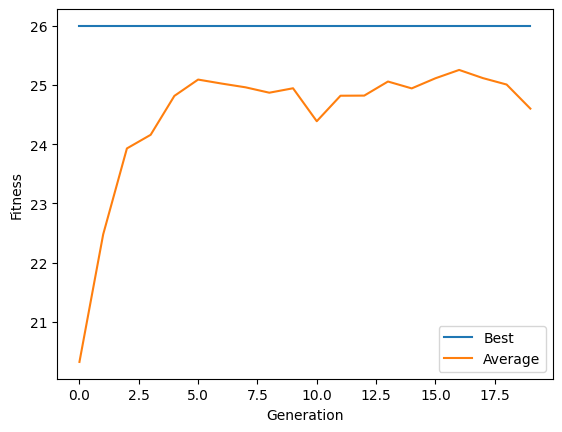

[0, 10, 10, 9, 0]

In [20]:
model = test1
population_size = 1000
generations = 20
tournament_size = 20
crossover_rate = 0.9
mutation_rate = 0.9
genetic_algorithm(test1,population_size, generations, tournament_size, crossover_rate, mutation_rate)

# Test 2

Iteration  1 : Best Fitness =  (26, 30) : Best Solution =  [10, 7, 0, 9, 4]
Iteration  2 : Best Fitness =  (26, 30) : Best Solution =  [10, 7, 0, 9, 4]
Iteration  3 : Best Fitness =  (26, 30) : Best Solution =  [10, 7, 0, 9, 4]
Iteration  4 : Best Fitness =  (26, 30) : Best Solution =  [10, 7, 0, 9, 4]
Iteration  5 : Best Fitness =  (26, 30) : Best Solution =  [0, 10, 10, 10, 0]
Iteration  6 : Best Fitness =  (26, 30) : Best Solution =  [10, 10, 0, 0, 10]
Iteration  7 : Best Fitness =  (26, 30) : Best Solution =  [10, 0, 0, 10, 10]
Iteration  8 : Best Fitness =  (26, 30) : Best Solution =  [10, 10, 0, 0, 10]
Iteration  9 : Best Fitness =  (26, 30) : Best Solution =  [10, 10, 0, 0, 10]
Iteration  10 : Best Fitness =  (26, 30) : Best Solution =  [10, 10, 10, 0, 0]
Iteration  11 : Best Fitness =  (26, 30) : Best Solution =  [10, 10, 10, 0, 0]
Iteration  12 : Best Fitness =  (26, 30) : Best Solution =  [10, 10, 10, 0, 0]
Iteration  13 : Best Fitness =  (26, 30) : Best Solution =  [10, 0, 1

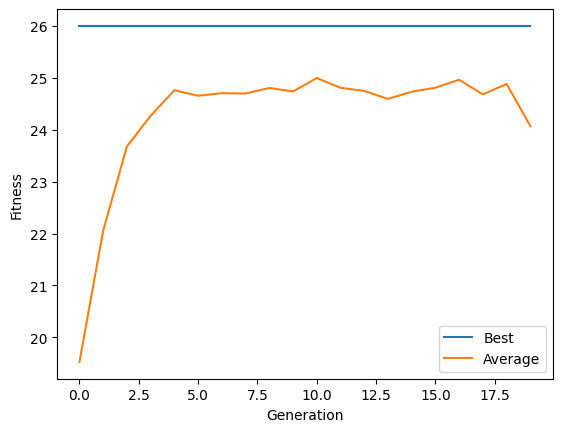

[10, 0, 0, 10, 10]

In [21]:
model = test2
population_size = 1000
generations = 20
tournament_size = 20
crossover_rate = 0.9
mutation_rate = 0.9
genetic_algorithm(model,population_size, generations, tournament_size, crossover_rate, mutation_rate)